In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd gdrive/My Drive/CS230

/content/gdrive/My Drive/CS230


# GPT2 only scripts

In [0]:
pip install transformers

     |████████████████████████████████| 675kB 2.8MB/s 
     |████████████████████████████████| 890kB 14.3MB/s 
     |████████████████████████████████| 1.1MB 16.9MB/s 
     |████████████████████████████████| 3.8MB 28.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=99fb229ae64d9fb1173689e396a329a8fde91ab75b6bac4841826257cfaf924f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [0]:
from transformers import GPT2Config, GPT2LMHeadModel, GPT2TokenizerFast
import torch

config = GPT2Config()

tokenizer = GPT2TokenizerFast.from_pretrained('gpt2', max_len=512)
tokenizer.pad_token = '<pad>'

model = GPT2LMHeadModel(config=config)

In [0]:
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="all.txt",
    block_size=128,
)

In [0]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

In [0]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./GPT2new-2",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_gpu_train_batch_size=32,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
    prediction_loss_only=True,
)

In [0]:
trainer.train()

{"loss": 1.5512563256025313, "learning_rate": 4.975947662112758e-05, "epoch": 0.04810467577448528, "step": 500}
{"loss": 1.5930414560437203, "learning_rate": 4.951895324225515e-05, "epoch": 0.09620935154897056, "step": 1000}
{"loss": 1.549421107530594, "learning_rate": 4.927842986338273e-05, "epoch": 0.14431402732345583, "step": 1500}
{"loss": 1.5732636432051659, "learning_rate": 4.9037906484510296e-05, "epoch": 0.19241870309794112, "step": 2000}
{"loss": 1.5443210139870645, "learning_rate": 4.879738310563787e-05, "epoch": 0.2405233788724264, "step": 2500}
{"loss": 1.5555437121391296, "learning_rate": 4.855685972676544e-05, "epoch": 0.28862805464691166, "step": 3000}
{"loss": 1.5414656393527986, "learning_rate": 4.8316336347893015e-05, "epoch": 0.33673273042139695, "step": 3500}
{"loss": 1.5455627790689468, "learning_rate": 4.807581296902059e-05, "epoch": 0.38483740619588225, "step": 4000}
{"loss": 1.5174515696763993, "learning_rate": 4.7835289590148165e-05, "epoch": 0.4329420819703675

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


{"loss": 1.4718061773777007, "learning_rate": 4.494900904367905e-05, "epoch": 1.0101981912641909, "step": 10500}
{"loss": 1.4183730962872505, "learning_rate": 4.470848566480662e-05, "epoch": 1.0583028670386763, "step": 11000}
{"loss": 1.3997100524306296, "learning_rate": 4.44679622859342e-05, "epoch": 1.1064075428131614, "step": 11500}
{"loss": 1.3980496806502343, "learning_rate": 4.4227438907061766e-05, "epoch": 1.1545122185876466, "step": 12000}
{"loss": 1.419847181379795, "learning_rate": 4.398691552818934e-05, "epoch": 1.202616894362132, "step": 12500}
{"loss": 1.4515884473323821, "learning_rate": 4.3746392149316916e-05, "epoch": 1.2507215701366172, "step": 13000}
{"loss": 1.438564662516117, "learning_rate": 4.350586877044449e-05, "epoch": 1.2988262459111026, "step": 13500}
{"loss": 1.4327191655039788, "learning_rate": 4.3265345391572066e-05, "epoch": 1.3469309216855878, "step": 14000}
{"loss": 1.458894559085369, "learning_rate": 4.3024822012699635e-05, "epoch": 1.395035597460073, 

{"loss": 1.3808122606277466, "learning_rate": 3.989801808735809e-05, "epoch": 2.0203963825283817, "step": 21000}
{"loss": 1.3243235739469528, "learning_rate": 3.965749470848567e-05, "epoch": 2.068501058302867, "step": 21500}
{"loss": 1.3466491847634317, "learning_rate": 3.941697132961324e-05, "epoch": 2.1166057340773525, "step": 22000}
{"loss": 1.3370804866254329, "learning_rate": 3.917644795074081e-05, "epoch": 2.1647104098518377, "step": 22500}
{"loss": 1.345180025756359, "learning_rate": 3.8935924571868385e-05, "epoch": 2.212815085626323, "step": 23000}
{"loss": 1.3446701183319092, "learning_rate": 3.869540119299596e-05, "epoch": 2.260919761400808, "step": 23500}
{"loss": 1.368750080883503, "learning_rate": 3.8454877814123536e-05, "epoch": 2.3090244371752933, "step": 24000}
{"loss": 1.3729849476218223, "learning_rate": 3.821435443525111e-05, "epoch": 2.357129112949779, "step": 24500}
{"loss": 1.3818097634315492, "learning_rate": 3.7973831056378686e-05, "epoch": 2.405233788724264, "s

{"loss": 1.3115901364088058, "learning_rate": 3.484702713103714e-05, "epoch": 3.030594573792573, "step": 31500}
{"loss": 1.2710634810626507, "learning_rate": 3.460650375216471e-05, "epoch": 3.078699249567058, "step": 32000}
{"loss": 1.2850368425250054, "learning_rate": 3.4365980373292286e-05, "epoch": 3.126803925341543, "step": 32500}
{"loss": 1.2339506326913834, "learning_rate": 3.4125456994419855e-05, "epoch": 3.1749086011160284, "step": 33000}
{"loss": 1.2858452498614787, "learning_rate": 3.388493361554743e-05, "epoch": 3.223013276890514, "step": 33500}
{"loss": 1.3019303193688392, "learning_rate": 3.3644410236675005e-05, "epoch": 3.271117952664999, "step": 34000}
{"loss": 1.287760569036007, "learning_rate": 3.340388685780258e-05, "epoch": 3.3192226284394843, "step": 34500}
{"loss": 1.3079655755162238, "learning_rate": 3.3163363478930156e-05, "epoch": 3.3673273042139695, "step": 35000}
{"loss": 1.2996934065818786, "learning_rate": 3.292284010005773e-05, "epoch": 3.4154319799884547, 

{"loss": 1.2268810659646987, "learning_rate": 2.9796036174716184e-05, "epoch": 4.040792765056763, "step": 42000}
{"loss": 1.2284008288383483, "learning_rate": 2.955551279584376e-05, "epoch": 4.088897440831249, "step": 42500}
{"loss": 1.2276072959899902, "learning_rate": 2.9314989416971334e-05, "epoch": 4.137002116605734, "step": 43000}
{"loss": 1.216488177359104, "learning_rate": 2.9074466038098903e-05, "epoch": 4.185106792380219, "step": 43500}
{"loss": 1.2029855620265006, "learning_rate": 2.8833942659226475e-05, "epoch": 4.233211468154705, "step": 44000}
{"loss": 1.2312894116640092, "learning_rate": 2.859341928035405e-05, "epoch": 4.28131614392919, "step": 44500}
{"loss": 1.2365393181443214, "learning_rate": 2.8352895901481625e-05, "epoch": 4.329420819703675, "step": 45000}
{"loss": 1.2467572981715203, "learning_rate": 2.8112372522609197e-05, "epoch": 4.37752549547816, "step": 45500}
{"loss": 1.2394935441017152, "learning_rate": 2.7871849143736772e-05, "epoch": 4.425630171252646, "st

{"loss": 1.2555406141281127, "learning_rate": 2.4985568597267657e-05, "epoch": 5.002886280546469, "step": 52000}
{"loss": 1.1875875114202499, "learning_rate": 2.474504521839523e-05, "epoch": 5.0509909563209545, "step": 52500}
{"loss": 1.1766641384363175, "learning_rate": 2.4504521839522804e-05, "epoch": 5.099095632095439, "step": 53000}
{"loss": 1.187673264503479, "learning_rate": 2.4263998460650376e-05, "epoch": 5.147200307869925, "step": 53500}
{"loss": 1.157288259357214, "learning_rate": 2.402347508177795e-05, "epoch": 5.1953049836444105, "step": 54000}
{"loss": 1.18615722951293, "learning_rate": 2.3782951702905523e-05, "epoch": 5.243409659418895, "step": 54500}
{"loss": 1.1747079725563525, "learning_rate": 2.3542428324033098e-05, "epoch": 5.291514335193381, "step": 55000}
{"loss": 1.154488022208214, "learning_rate": 2.3301904945160673e-05, "epoch": 5.339619010967866, "step": 55500}
{"loss": 1.1851042405068875, "learning_rate": 2.3061381566288245e-05, "epoch": 5.387723686742351, "st

{"loss": 1.1670540046989917, "learning_rate": 1.99345776409467e-05, "epoch": 6.01308447181066, "step": 62500}
{"loss": 1.0899380594193935, "learning_rate": 1.9694054262074273e-05, "epoch": 6.061189147585146, "step": 63000}
{"loss": 1.118738705933094, "learning_rate": 1.945353088320185e-05, "epoch": 6.10929382335963, "step": 63500}
{"loss": 1.1099229986965655, "learning_rate": 1.9213007504329424e-05, "epoch": 6.157398499134116, "step": 64000}
{"loss": 1.1373853596746921, "learning_rate": 1.8972484125456995e-05, "epoch": 6.205503174908601, "step": 64500}
{"loss": 1.1209191954433917, "learning_rate": 1.8731960746584567e-05, "epoch": 6.253607850683086, "step": 65000}
{"loss": 1.103322835803032, "learning_rate": 1.8491437367712142e-05, "epoch": 6.301712526457572, "step": 65500}
{"loss": 1.115586416900158, "learning_rate": 1.8250913988839714e-05, "epoch": 6.349817202232057, "step": 66000}
{"loss": 1.1374007642269135, "learning_rate": 1.801039060996729e-05, "epoch": 6.397921878006542, "step":

{"loss": 1.1122530838549136, "learning_rate": 1.4883586684625748e-05, "epoch": 7.023282663074851, "step": 73000}
{"loss": 1.077769923567772, "learning_rate": 1.4643063305753321e-05, "epoch": 7.071387338849336, "step": 73500}
{"loss": 1.0941560049057006, "learning_rate": 1.4402539926880893e-05, "epoch": 7.119492014623821, "step": 74000}
{"loss": 1.0665165768563747, "learning_rate": 1.4162016548008467e-05, "epoch": 7.167596690398307, "step": 74500}
{"loss": 1.0776900710761548, "learning_rate": 1.392149316913604e-05, "epoch": 7.215701366172792, "step": 75000}
{"loss": 1.0986787087917327, "learning_rate": 1.3680969790263615e-05, "epoch": 7.263806041947277, "step": 75500}
{"loss": 1.0703114159107208, "learning_rate": 1.3440446411391189e-05, "epoch": 7.311910717721762, "step": 76000}
{"loss": 1.084713762640953, "learning_rate": 1.3199923032518762e-05, "epoch": 7.360015393496248, "step": 76500}
{"loss": 1.07640082898736, "learning_rate": 1.2959399653646334e-05, "epoch": 7.408120069270733, "st

{"loss": 1.0251803379058837, "learning_rate": 9.83259572830479e-06, "epoch": 8.033480854339041, "step": 83500}
{"loss": 1.044325642377138, "learning_rate": 9.592072349432366e-06, "epoch": 8.081585530113527, "step": 84000}
{"loss": 1.0317953082323075, "learning_rate": 9.351548970559938e-06, "epoch": 8.129690205888012, "step": 84500}
{"loss": 1.0015536547601223, "learning_rate": 9.111025591687513e-06, "epoch": 8.177794881662498, "step": 85000}
{"loss": 1.0592361744642258, "learning_rate": 8.870502212815086e-06, "epoch": 8.225899557436982, "step": 85500}
{"loss": 1.0481411541104317, "learning_rate": 8.62997883394266e-06, "epoch": 8.274004233211468, "step": 86000}
{"loss": 1.0429347530901432, "learning_rate": 8.389455455070233e-06, "epoch": 8.322108908985953, "step": 86500}
{"loss": 1.0359599581360817, "learning_rate": 8.148932076197807e-06, "epoch": 8.370213584760439, "step": 87000}
{"loss": 1.0615962873995304, "learning_rate": 7.90840869732538e-06, "epoch": 8.418318260534924, "step": 875

{"loss": 1.0173598893284799, "learning_rate": 4.781604771983837e-06, "epoch": 9.043679045603232, "step": 94000}
{"loss": 1.0090839240849019, "learning_rate": 4.5410813931114104e-06, "epoch": 9.091783721377718, "step": 94500}
{"loss": 0.9924930114448071, "learning_rate": 4.300558014238984e-06, "epoch": 9.139888397152204, "step": 95000}
{"loss": 1.018649611711502, "learning_rate": 4.060034635366558e-06, "epoch": 9.18799307292669, "step": 95500}
{"loss": 1.0094648390710355, "learning_rate": 3.819511256494132e-06, "epoch": 9.236097748701173, "step": 96000}
{"loss": 1.011359853297472, "learning_rate": 3.5789878776217047e-06, "epoch": 9.284202424475659, "step": 96500}
{"loss": 1.0041653116345406, "learning_rate": 3.338464498749279e-06, "epoch": 9.332307100250144, "step": 97000}
{"loss": 1.0207116776704788, "learning_rate": 3.097941119876852e-06, "epoch": 9.38041177602463, "step": 97500}
{"loss": 1.0138043597340585, "learning_rate": 2.8574177410044256e-06, "epoch": 9.428516451799116, "step": 

TrainOutput(global_step=103940, training_loss=1.2277424066718357)

In [0]:
model.save_pretrained('./GPT2new-2')

# Fine-tune GPT-2 Model

In [4]:
from transformers import GPT2Config, GPT2LMHeadModel, GPT2TokenizerFast
import torch

config = GPT2Config()

tokenizer = GPT2TokenizerFast.from_pretrained('gpt2')
# tokenizer.add_tokens('<pad>')
# tokenizer.pad_token = '<pad>'

model = GPT2LMHeadModel.from_pretrained('gpt2', config=config)



In [0]:
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="all.txt",
    block_size=128,
)

Using pad_token, but it is not set yet.


In [0]:
tokenizer.add_tokens('<pad>')
tokenizer.pad_token = '<pad>'

In [0]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

In [0]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./GPT2final",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_gpu_train_batch_size=32,
    save_steps=5_000,
    save_total_limit=25,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
    prediction_loss_only=True,
)

In [0]:
trainer.train()

Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.
Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.


{"loss": 1.6401803650259972, "learning_rate": 4.975947662112758e-05, "epoch": 0.04810467577448528, "step": 500}
{"loss": 1.5175289533138274, "learning_rate": 4.951895324225515e-05, "epoch": 0.09620935154897056, "step": 1000}
{"loss": 1.4390734946727752, "learning_rate": 4.927842986338273e-05, "epoch": 0.14431402732345583, "step": 1500}
{"loss": 1.446465976178646, "learning_rate": 4.9037906484510296e-05, "epoch": 0.19241870309794112, "step": 2000}
{"loss": 1.410950969696045, "learning_rate": 4.879738310563787e-05, "epoch": 0.2405233788724264, "step": 2500}
{"loss": 1.4108901364803315, "learning_rate": 4.855685972676544e-05, "epoch": 0.28862805464691166, "step": 3000}
{"loss": 1.3946977502703666, "learning_rate": 4.8316336347893015e-05, "epoch": 0.33673273042139695, "step": 3500}
{"loss": 1.3897837663292885, "learning_rate": 4.807581296902059e-05, "epoch": 0.38483740619588225, "step": 4000}
{"loss": 1.3602417254447936, "learning_rate": 4.7835289590148165e-05, "epoch": 0.43294208197036754

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


{"loss": 1.3879476374983788, "learning_rate": 4.735424283240331e-05, "epoch": 0.5291514335193381, "step": 5500}
{"loss": 1.3757057723402977, "learning_rate": 4.7113719453530884e-05, "epoch": 0.5772561092938233, "step": 6000}
{"loss": 1.3709573012590408, "learning_rate": 4.687319607465846e-05, "epoch": 0.6253607850683086, "step": 6500}
{"loss": 1.3615453414916991, "learning_rate": 4.6632672695786034e-05, "epoch": 0.6734654608427939, "step": 7000}
{"loss": 1.3419455333948136, "learning_rate": 4.639214931691361e-05, "epoch": 0.7215701366172792, "step": 7500}
{"loss": 1.330297500550747, "learning_rate": 4.6151625938041185e-05, "epoch": 0.7696748123917645, "step": 8000}
{"loss": 1.3396385619044304, "learning_rate": 4.591110255916875e-05, "epoch": 0.8177794881662498, "step": 8500}
{"loss": 1.3384682602882385, "learning_rate": 4.567057918029632e-05, "epoch": 0.8658841639407351, "step": 9000}
{"loss": 1.3211982418000698, "learning_rate": 4.54300558014239e-05, "epoch": 0.9139888397152203, "step

{"loss": 1.3165454849600793, "learning_rate": 4.494900904367905e-05, "epoch": 1.0101981912641909, "step": 10500}
{"loss": 1.254401016831398, "learning_rate": 4.470848566480662e-05, "epoch": 1.0583028670386763, "step": 11000}
{"loss": 1.2453344039320946, "learning_rate": 4.44679622859342e-05, "epoch": 1.1064075428131614, "step": 11500}
{"loss": 1.2390728244185447, "learning_rate": 4.4227438907061766e-05, "epoch": 1.1545122185876466, "step": 12000}
{"loss": 1.2582726974487304, "learning_rate": 4.398691552818934e-05, "epoch": 1.202616894362132, "step": 12500}
{"loss": 1.2899464277625083, "learning_rate": 4.3746392149316916e-05, "epoch": 1.2507215701366172, "step": 13000}
{"loss": 1.2752291109263898, "learning_rate": 4.350586877044449e-05, "epoch": 1.2988262459111026, "step": 13500}
{"loss": 1.2671422559022902, "learning_rate": 4.3265345391572066e-05, "epoch": 1.3469309216855878, "step": 14000}
{"loss": 1.2942377316951752, "learning_rate": 4.3024822012699635e-05, "epoch": 1.395035597460073

{"loss": 1.212020094513893, "learning_rate": 3.989801808735809e-05, "epoch": 2.0203963825283817, "step": 21000}
{"loss": 1.1752513642311095, "learning_rate": 3.965749470848567e-05, "epoch": 2.068501058302867, "step": 21500}
{"loss": 1.191142380833626, "learning_rate": 3.941697132961324e-05, "epoch": 2.1166057340773525, "step": 22000}
{"loss": 1.1833705401420593, "learning_rate": 3.917644795074081e-05, "epoch": 2.1647104098518377, "step": 22500}
{"loss": 1.1910009137392044, "learning_rate": 3.8935924571868385e-05, "epoch": 2.212815085626323, "step": 23000}
{"loss": 1.1871432547271252, "learning_rate": 3.869540119299596e-05, "epoch": 2.260919761400808, "step": 23500}
{"loss": 1.2154311317503452, "learning_rate": 3.8454877814123536e-05, "epoch": 2.3090244371752933, "step": 24000}
{"loss": 1.2158352801203727, "learning_rate": 3.821435443525111e-05, "epoch": 2.357129112949779, "step": 24500}
{"loss": 1.227840636909008, "learning_rate": 3.7973831056378686e-05, "epoch": 2.405233788724264, "st

{"loss": 1.1623618577718735, "learning_rate": 3.484702713103714e-05, "epoch": 3.030594573792573, "step": 31500}
{"loss": 1.134173463523388, "learning_rate": 3.460650375216471e-05, "epoch": 3.078699249567058, "step": 32000}
{"loss": 1.1442949253022672, "learning_rate": 3.4365980373292286e-05, "epoch": 3.126803925341543, "step": 32500}
{"loss": 1.1001199173927307, "learning_rate": 3.4125456994419855e-05, "epoch": 3.1749086011160284, "step": 33000}
{"loss": 1.153059289455414, "learning_rate": 3.388493361554743e-05, "epoch": 3.223013276890514, "step": 33500}
{"loss": 1.1595555672049522, "learning_rate": 3.3644410236675005e-05, "epoch": 3.271117952664999, "step": 34000}
{"loss": 1.1465245342850685, "learning_rate": 3.340388685780258e-05, "epoch": 3.3192226284394843, "step": 34500}
{"loss": 1.1645945551991463, "learning_rate": 3.3163363478930156e-05, "epoch": 3.3673273042139695, "step": 35000}
{"loss": 1.1593166229128837, "learning_rate": 3.292284010005773e-05, "epoch": 3.4154319799884547, "

{"loss": 1.1050453388094903, "learning_rate": 2.9796036174716184e-05, "epoch": 4.040792765056763, "step": 42000}
{"loss": 1.1039796308279037, "learning_rate": 2.955551279584376e-05, "epoch": 4.088897440831249, "step": 42500}
{"loss": 1.1066095128059388, "learning_rate": 2.9314989416971334e-05, "epoch": 4.137002116605734, "step": 43000}
{"loss": 1.098308525621891, "learning_rate": 2.9074466038098903e-05, "epoch": 4.185106792380219, "step": 43500}
{"loss": 1.0866510365903377, "learning_rate": 2.8833942659226475e-05, "epoch": 4.233211468154705, "step": 44000}
{"loss": 1.1061930133998394, "learning_rate": 2.859341928035405e-05, "epoch": 4.28131614392919, "step": 44500}
{"loss": 1.1137229483127593, "learning_rate": 2.8352895901481625e-05, "epoch": 4.329420819703675, "step": 45000}
{"loss": 1.1279669194817543, "learning_rate": 2.8112372522609197e-05, "epoch": 4.37752549547816, "step": 45500}
{"loss": 1.1282825303673745, "learning_rate": 2.7871849143736772e-05, "epoch": 4.425630171252646, "st

{"loss": 1.1354295392930507, "learning_rate": 2.4985568597267657e-05, "epoch": 5.002886280546469, "step": 52000}
{"loss": 1.0959352704286576, "learning_rate": 2.474504521839523e-05, "epoch": 5.0509909563209545, "step": 52500}
{"loss": 1.0759533909261227, "learning_rate": 2.4504521839522804e-05, "epoch": 5.099095632095439, "step": 53000}
{"loss": 1.0854454744756221, "learning_rate": 2.4263998460650376e-05, "epoch": 5.147200307869925, "step": 53500}
{"loss": 1.0625390193164348, "learning_rate": 2.402347508177795e-05, "epoch": 5.1953049836444105, "step": 54000}
{"loss": 1.0878336852788926, "learning_rate": 2.3782951702905523e-05, "epoch": 5.243409659418895, "step": 54500}
{"loss": 1.0731726256012917, "learning_rate": 2.3542428324033098e-05, "epoch": 5.291514335193381, "step": 55000}
{"loss": 1.0585934429168702, "learning_rate": 2.3301904945160673e-05, "epoch": 5.339619010967866, "step": 55500}
{"loss": 1.0858240512907504, "learning_rate": 2.3061381566288245e-05, "epoch": 5.387723686742351

{"loss": 1.0759517707526685, "learning_rate": 1.99345776409467e-05, "epoch": 6.01308447181066, "step": 62500}
{"loss": 1.020115881741047, "learning_rate": 1.9694054262074273e-05, "epoch": 6.061189147585146, "step": 63000}
{"loss": 1.0439794521331787, "learning_rate": 1.945353088320185e-05, "epoch": 6.10929382335963, "step": 63500}
{"loss": 1.0370549440681935, "learning_rate": 1.9213007504329424e-05, "epoch": 6.157398499134116, "step": 64000}
{"loss": 1.0552104716598987, "learning_rate": 1.8972484125456995e-05, "epoch": 6.205503174908601, "step": 64500}
{"loss": 1.0433158364892006, "learning_rate": 1.8731960746584567e-05, "epoch": 6.253607850683086, "step": 65000}
{"loss": 1.0322612190842628, "learning_rate": 1.8491437367712142e-05, "epoch": 6.301712526457572, "step": 65500}
{"loss": 1.0416546205878259, "learning_rate": 1.8250913988839714e-05, "epoch": 6.349817202232057, "step": 66000}
{"loss": 1.0608559286296368, "learning_rate": 1.801039060996729e-05, "epoch": 6.397921878006542, "step

{"loss": 1.0447041966915132, "learning_rate": 1.4883586684625748e-05, "epoch": 7.023282663074851, "step": 73000}
{"loss": 1.0233400048613548, "learning_rate": 1.4643063305753321e-05, "epoch": 7.071387338849336, "step": 73500}
{"loss": 1.0404659423232079, "learning_rate": 1.4402539926880893e-05, "epoch": 7.119492014623821, "step": 74000}
{"loss": 1.0065186781287194, "learning_rate": 1.4162016548008467e-05, "epoch": 7.167596690398307, "step": 74500}
{"loss": 1.0277965875566006, "learning_rate": 1.392149316913604e-05, "epoch": 7.215701366172792, "step": 75000}
{"loss": 1.045866680264473, "learning_rate": 1.3680969790263615e-05, "epoch": 7.263806041947277, "step": 75500}
{"loss": 1.021334010630846, "learning_rate": 1.3440446411391189e-05, "epoch": 7.311910717721762, "step": 76000}
{"loss": 1.029982608795166, "learning_rate": 1.3199923032518762e-05, "epoch": 7.360015393496248, "step": 76500}
{"loss": 1.0207558028697967, "learning_rate": 1.2959399653646334e-05, "epoch": 7.408120069270733, "s

KeyboardInterrupt: ignored

In [0]:
trainer.save_model("./GPT2final")

# Checking points

In [0]:
checkpoints = ['checkpoint-5000', 'checkpoint-10000', 'checkpoint-15000', 'checkpoint-20000', 'checkpoint-25000', 'checkpoint-30000', 'checkpoint-35000', 'checkpoint-40000', 'checkpoint-45000', 
 'checkpoint-50000', 'checkpoint-55000', 'checkpoint-60000', 'checkpoint-65000', 'checkpoint-70000', 'checkpoint-75000', 'checkpoint-80000']
checkdict = {}

for i in checkpoints:
  checkdict[i] = GPT2LMHeadModel.from_pretrained('./GPT2final/' + i, config=config)
checkdict['gpt'] = model
checkdict['final'] = GPT2LMHeadModel.from_pretrained('./GPT2final/', config=config)


In [0]:
checkdict['new'] = GPT2LMHeadModel.from_pretrained('./GPT2new-2/', config=config)

In [0]:
checkdict['new-1'] = GPT2LMHeadModel.from_pretrained('./GPT2new-2/checkpoint-90000/', config=config)

In [0]:
love_input = torch.tensor(tokenizer.encode("love", add_special_tokens=True)).unsqueeze(0)
m = torch.nn.Softmax(dim=2)

In [0]:
plove = {}
for i in checkpoints:
  plove[i] = torch.distributions.categorical.Categorical(m(checkdict[i](love_input)[0]))

In [0]:
for i in ['gpt', 'final', 'new', 'new-1']:
  plove[i] = torch.distributions.categorical.Categorical(m(checkdict[i](love_input)[0]))

In [145]:
KLlovenew = torch.distributions.kl.kl_divergence(plove['gpt'], plove['new'])[0][0].detach().numpy()
print(KLlovenew)

2.848151


In [0]:
KLlove = np.zeros(len(checkpoints))
ind = 0 

for i in checkpoints:
  # print(i + ':')
  KL = torch.distributions.kl.kl_divergence(plove['gpt'], plove[i])[0][0]
  KLlove[ind] = KL.detach().numpy()
  ind += 1

In [0]:
pthe = {}
KLthe = np.zeros(len(checkpoints))
ind = 0
the_input = torch.tensor(tokenizer.encode("the", add_special_tokens=True)).unsqueeze(0)
for i in checkpoints:
  pthe[i] = torch.distributions.categorical.Categorical(m(checkdict[i](the_input)[0]))
for i in ['gpt', 'final', 'new', 'new-1']:
  pthe[i] = torch.distributions.categorical.Categorical(m(checkdict[i](the_input)[0]))
for i in checkpoints:
  # print(i + ':')
  KL = torch.distributions.kl.kl_divergence(pthe['gpt'], pthe[i])[0][0]
  KLthe[ind] = KL.detach().numpy()
  ind += 1

In [146]:
KLthenew = torch.distributions.kl.kl_divergence(pthe['gpt'], pthe['new'])[0][0].detach().numpy()
print(KLthenew)

3.0305161


In [0]:
pdereg = {}
KLdereg = np.zeros(len(checkpoints))
ind = 0
dereg_input = torch.tensor(tokenizer.encode(" deregulation", add_special_tokens=True)).unsqueeze(0)
for i in checkpoints:
  pdereg[i] = torch.distributions.categorical.Categorical(m(checkdict[i](dereg_input)[0]))
for i in ['gpt', 'final', 'new', 'new-1']:
  pdereg[i] = torch.distributions.categorical.Categorical(m(checkdict[i](dereg_input)[0]))
for i in checkpoints:
  print(i + ':')
  KL = torch.distributions.kl.kl_divergence(pdereg['gpt'], pdereg[i])[0][0]
  print(KL)
  KLdereg[ind] = KL.detach().numpy()
  ind += 1

In [147]:
KLderegnew = torch.distributions.kl.kl_divergence(pdereg['gpt'], pdereg['new'])[0][0].detach().numpy()
print(KLderegnew)

2.7949219


In [0]:
pexc = {}
KLexc = np.zeros(len(checkpoints))
ind = 0
exc_input = torch.tensor(tokenizer.encode("!", add_special_tokens=True)).unsqueeze(0)
for i in checkpoints:
  pexc[i] = torch.distributions.categorical.Categorical(m(checkdict[i](exc_input)[0]))
for i in ['gpt', 'final', 'new', 'new-1']:
  pexc[i] = torch.distributions.categorical.Categorical(m(checkdict[i](exc_input)[0]))
for i in checkpoints:
  print(i + ':')
  KL = torch.distributions.kl.kl_divergence(pexc['gpt'], pexc[i])[0][0]
  print(KL)
  KLexc[ind] = KL.detach().numpy()
  ind += 1

In [148]:
KLexcnew = torch.distributions.kl.kl_divergence(pexc['gpt'], pexc['new'])[0][0].detach().numpy()
print(KLexcnew)

5.7547193


In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
checkno = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]) * 10
loss = np.array([1.4465, 1.3898, 1.3757, 1.3303, 1.3323, 1.2391, 1.2671, 1.2348, 1.2786, 1.2569, 1.1911, 1.2154, 1.1853, 1.2104, 1.1965, 
                 1.1342, 1.1596, 1.1586, 1.1675, 1.1498, 1.1050, 1.0867, 1.1283, 1.1257, 1.1336, 1.1354, 1.0625, 1.0395, 1.0753, 1.0788, 
                 1.0821, 1.0371, 1.0417, 1.0475, 1.0464, 1.0827, 1.0405, 1.0213, 1.0125, 1.0274]
                )
lossno = np.arange(2000, 82000, 2000)

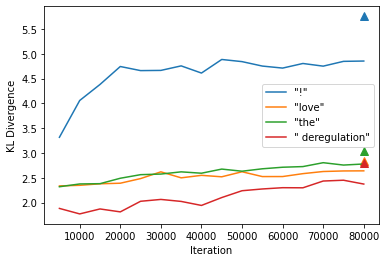

In [156]:
plt.figure()
plt.plot(checkno, KLexc, label='"!"', color="tab:blue")
plt.plot(80000, KLexcnew, color="tab:blue", marker="^", markersize=8)
plt.plot(checkno, KLlove, label='"love"', color="tab:orange")
plt.plot(80000, KLlovenew, color="tab:orange", marker="^", markersize=8)
plt.plot(checkno, KLthe, label='"the"', color="tab:green")
plt.plot(80000, KLthenew, color="tab:green", marker="^", markersize=8)
plt.plot(checkno, KLdereg, label='" deregulation"', color="tab:red")
plt.plot(80000, KLderegnew, color="tab:red", marker="^", markersize=8)
plt.legend()
plt.ylabel('KL Divergence')
plt.xlabel('Iteration')
plt.show()

Text(0, 0.5, 'Loss')

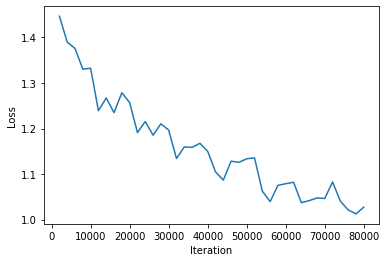

In [84]:
plt.figure()
plt.plot(lossno, loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [85]:
prompt = '''JOHNNY
Well because it was an out of state bank. Anyway, I was working as a busboy in a hotel, and she was sitting, drinking her coffee, and she was so beautiful, and I say hi to her. That’s how we met.

MARK
So, I mean, what's the interesting part?

JOHNNY
Well the interesting part is that
'''
inputs = tokenizer.encode(prompt, add_special_tokens=True, return_tensors="pt")
outputs = checkdict['gpt'].generate(inputs, max_length=300, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputs[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


'JOHNNY\nWell because it was an out of state bank. Anyway, I was working as a busboy in a hotel, and she was sitting, drinking her coffee, and she was so beautiful, and I say hi to her. That’s how we met.\n\nMARK\nSo, I mean, what\'s the interesting part?\n\nJOHNNY\nWell the interesting part is that\nto me, I think this is like the worst type of scandal or something and then you\'re trying to get the information out. I guess it is sort of interesting, the people on the Internet do this all the time. When you\'re able to get information or a tip on people you\'re like "Where have you gotten it from?" Well, that I thought of at the time.\n\nAnd then we just go through it and put it through a series of filters and then I just get sort of sad because I know there\'s nothing wrong at all. I know, as you know, that kind of people, that kind of people you know, they don\'t know what they\'re talking about. We just go out there and read information on them. As soon as someone comes in they don

In [88]:
outputs = checkdict['new'].generate(inputs, max_length=300, do_sample=True, top_p=0.95, top_k=100, temperature=0.8)

tokenizer.decode(outputs[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


'JOHNNY\nWell because it was an out of state bank. Anyway, I was working as a busboy in a hotel, and she was sitting, drinking her coffee, and she was so beautiful, and I say hi to her. That’s how we met.\n\nMARK\nSo, I mean, what\'s the interesting part?\n\nJOHNNY\nWell the interesting part is that\n. I\'ve! They. You don got! Who, you! It was! I was! It was! You got! I think! Who. You know! You got! You areG! You didn! You\'reP This thought. To\'re You\'re is! What a great! It\'reP couldn do --K was a handsome...?! got! I have! I never You want am liked! I didn had a good real... an - an big guy know\'t got to Come and up! I know, and OK. What are You made a great-- was a kid a bit. You don!" was all was a liar, I didn! I didn\'t been, in is a big kid. You\'reMT saw to Three, inaGK ever. ( got to What took a lot! You knew in always! Who\'re all, you! I\'m got got...M got to This took. How should got toM decided a big sweet!?... you! You\'re You\'re married child have got to You\'re'

In [105]:
prompt2 = '''I hate the way you talk to me, and the way you cut your hair. I hate the way you drive my car. I hate it when you stare, I hate your big dumb combat boots and the way you read my mind. I hate you so much it makes me sick, it even makes me rhyme'''
inputs2 = tokenizer.encode(prompt2, add_special_tokens=True, return_tensors="pt")
outputs2 = checkdict['gpt'].generate(inputs2, max_length=300, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputs2[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


'I hate the way you talk to me, and the way you cut your hair. I hate the way you drive my car. I hate it when you stare, I hate your big dumb combat boots and the way you read my mind. I hate you so much it makes me sick, it even makes me rhyme: it means something awful."\n\nAs they\'d both learned in school they shared another story: a teenager working for a corporate giant\'s corporate education center who saw a teacher\'s boss and looked in the mirror.\n\n"I was so sad," she said, "because I wanted to sit here and look like everyone else but me."\n\nWhat happened was that on a typical day she wouldn\'t show up in classes unless the teacher called and confirmed with her and told her to. Another student described being able to see the teacher and seeing his face. But she couldn\'t. Instead, she took to social media, posting picture photos of herself, trying to connect with her classmates, meeting online.\n\n"I am actually sick," she later said. "I don\'t know how to say this one can\

In [90]:
outputs2a = checkdict['checkpoint-80000'].generate(inputs2, max_length=300, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputs2a[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


"I hate the way you talk to me, and the way you cut your hair. I hate the way you drive my car. I hate it when you stare, I hate your big dumb combat boots and the way you read my mind. I hate you so much it makes me sick, it even makes me rhyme. So I bought a new-booth. This is, and I'm-I know it. I hate- the way you like me, and the way you so. It-It-I hate- all. Why-why'd you switch. (I have a new-booth. My, oh my-my. I have a.oh. What the fuck? (PAT EMBRACE) But all I know is I'm beginning to like you. You know the way I am. I'm starting to like you. What the way. So when the guy in 'the.shit' says no-no to me. (an' I hate you, this.so. But the way you're.doing it, I'm.doing it.  Like it, what in so. words. (He is.you know 'but I'm not.'I 't.buying. I.a book.so. (LIT. I put' so much' (my head 'onto him. The.my'.face..) 'cause my.me. 'I.i can't'use you."

In [91]:
outputs2a = checkdict['checkpoint-10000'].generate(inputs2, max_length=300, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputs2a[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


"I hate the way you talk to me, and the way you cut your hair. I hate the way you drive my car. I hate it when you stare, I hate your big dumb combat boots and the way you read my mind. I hate you so much it makes me sick, it even makes me rhyme the lyrics. I'm like that. I just want a little better. It's just itchy. I'm so... so old. I...I got a job. And I... I know I could...I-- I'm just so tired, really, and I want to--..lose something- I've got a thing for a guy...a thing for-- you. I...like a big-ass dragon. I know. And I have a life. And...I have a--I'm my dad. But the way you put it--you call it, I've been on a little run, and I--and I'm getting older and more sick. And I'm tired. I...have a lot of....nothin' left...you know-- and- and I'm so sorry about my...at the-- I just-I can't--want the rest of your world to start having a job with you or a--I need you, for the most part. I hope you, I'm, I want it-- You know, I'm a little--I've been running over to him... I'm not...with"

In [102]:
prompt3 = '''ILSA
But what about us?

RICK
We'll always have Paris. We didn't have, we, we lost it until you came to Casablanca. We got it back last night

ILSA
When I said I would never leave you'''
inputs3 = tokenizer.encode(prompt3, add_special_tokens=True, return_tensors="pt")
outputs3 = checkdict['gpt'].generate(inputs3, max_length=150, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputs3[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


"ILSA\nBut what about us?\n\nRICK\nWe'll always have Paris. We didn't have, we, we lost it until you came to Casablanca. We got it back last night\n\nILSA\nWhen I said I would never leave you, she had tears in her eyes, I thought of getting you up there on the roof of the building, I could still lay flowers.\n\n\nRICK\nWe're friends now and you love us, she said. I had an easy life, we had fun together...\n\n\nBut her heart swells with a sense of loss, a sense of betrayal and sadness.\n\n\nRORY\nThe only hope left for you and your dog is not to go home,"

In [158]:
outputsb = checkdict['checkpoint-80000'].generate(inputs3, max_length=150, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputsb[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


"ILSA\nBut what about us?\n\nRICK\nWe'll always have Paris. We didn't have, we, we lost it until you came to Casablanca. We got it back last night\n\nILSA\nWhen I said I would never leave you, my heart leapt. I'm not gonna take me!! We're just like, they'd be best pals! We're gonna have a fight. You wanna make us- if we can. (SMILING COUPLES) So you know how? The man has no class, or a will. My heart, he's a nobody. (LIPSTERian tongue)Spinning and full. With nothing.'s class. The man has no passion."

In [108]:
outputsc = checkdict['checkpoint-10000'].generate(inputs3, max_length=150, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputsc[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


'ILSA\nBut what about us?\n\nRICK\nWe\'ll always have Paris. We didn\'t have, we, we lost it until you came to Casablanca. We got it back last night\n\nILSA\nWhen I said I would never leave you so I said the night before, "I would leave for you." I really was thinking, You know, because that\'s -so much you\'d been through - but, it\'s not. I\'m very happy with you. We got a deal, he\'s the one who gave me that three and your idea, that\'s what we did.  So we talked, we talked, we drank, we married. We\'ve always talked, we\'ve done. The idea is'

In [143]:
outputsd = checkdict['new'].generate(inputs3, max_length=150, do_sample=True, top_p=0.95, top_k=100, temperature=1.1)

tokenizer.decode(outputsd[0].numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


"ILSA\nBut what about us?\n\nRICK\nWe'll always have Paris. We didn't have, we, we lost it until you came to Casablanca. We got it back last night\n\nILSA\nWhen I said I would never leave you! I! We!!! For to go! What to! We have! Let! Let! You! Be to In! You aIDE I haven! They? You just! You could Did to go! You're You need!  I ever For for! It had to do so Not. You are  I want to turn to stop into or What even shot a army a break for hung a hand! We go down! Who to show a fight one cast"